In [1]:
import networkx as nx
import osmnx as ox
import nx_arangodb as nxadb

from arango import ArangoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool

[00:24:01 -0500] [INFO]: NetworkX-cuGraph is unavailable: No module named 'cupy'.


In [2]:
db = ArangoClient(hosts="http://localhost:8529").db(username="root", password="openSesame", verify=True)

print(db)

<StandardDatabase _system>


In [48]:
G_fh = ox.graph_from_place('Forest Hills, Queens, NY',simplify=True)

In [49]:
for n1, n2, d in G_fh.edges(data=True):
    d.pop('geometry', None)

In [50]:
print(G_fh)

MultiDiGraph with 3666 nodes and 11199 edges


In [53]:
nx.to_dict_of_dicts(G_fh)

{42785768: {7744129774: {0: {'osmid': 216926516,
    'highway': 'secondary',
    'lanes': '2',
    'name': 'Metropolitan Avenue',
    'oneway': False,
    'reversed': False,
    'length': 25.29143395739426}},
  9554117070: {0: {'osmid': 216926516,
    'highway': 'secondary',
    'lanes': '2',
    'name': 'Metropolitan Avenue',
    'oneway': False,
    'reversed': True,
    'length': 35.766614581545255}}},
 42785771: {10650749666: {0: {'osmid': 5699819,
    'highway': 'residential',
    'name': '75th Avenue',
    'oneway': True,
    'reversed': False,
    'length': 6.2974015867684345}},
  42865025: {0: {'osmid': 1004701345,
    'highway': 'residential',
    'name': 'Kessel Street',
    'oneway': True,
    'reversed': False,
    'length': 63.98385203596936}}},
 42785813: {9919823484: {0: {'osmid': 5699826,
    'highway': 'residential',
    'name': '75th Avenue',
    'oneway': True,
    'reversed': False,
    'length': 7.513420577605161}},
  10650784001: {0: {'osmid': 275134196,
    'high

In [62]:
G_fh_nxadb = nxadb.MultiDiGraph(name="Forest_Hills",
                                db=db,
                                incoming_graph_data=G_fh,
                                overwrite_graph=True)

print(G_fh_nxadb)

[00:59:44 -0500] [INFO]: Overwriting graph 'Forest_Hills'
[00:59:45 -0500] [INFO]: Graph 'Forest_Hills' exists.
[00:59:45 -0500] [INFO]: Default node type set to 'Forest_Hills_node'
[2025/02/24 00:59:45 -0500] [85193] [INFO] - adbnx_adapter: Instantiated ADBNX_Adapter with database '_system'


Output()

Output()

[2025/02/24 00:59:45 -0500] [85193] [INFO] - adbnx_adapter: Created ArangoDB 'Forest_Hills' Graph


MultiDiGraph named 'Forest_Hills' with 3666 nodes and 0 edges


In [65]:
print(G_fh_nxadb.number_of_edges())
print(G_fh.number_of_edges())

11199
11199


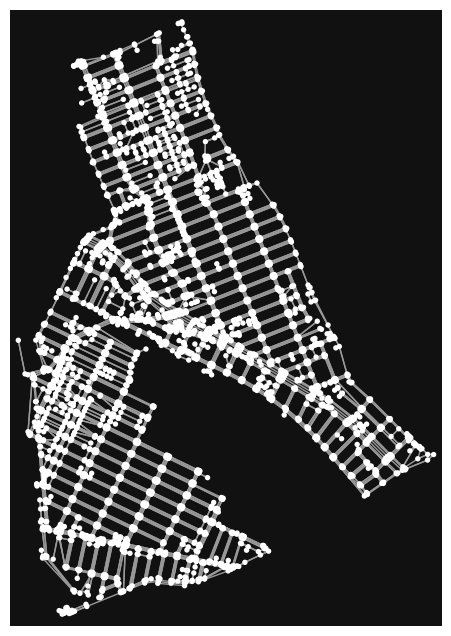

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [33]:
ox.plot_graph(G_fh)

In [66]:
arango_graph = ArangoGraph(db)